In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
import pandas as pd
import numpy as np

In [143]:
data_training = pd.read_csv('data.csv')
data_testing = pd.read_csv('data.csv', index_col=0)

In [144]:
data_training.head()

,output,a,b,gate
0,1,1,1,or
1,1,1,0,or
2,1,0,1,or
3,0,0,0,or
4,1,1,1,and


In [145]:
data_testing.head()

,a,b,gate
output,,,
1,1,1,or
1,1,0,or
1,0,1,or
0,0,0,or
1,1,1,and


In [146]:
x = pd.get_dummies(data_training[['a','b','gate']])
x.head()

,a,b,gate_and,gate_nand,gate_nor,gate_or,gate_xor
0,1,1,0,0,0,1,0
1,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0
4,1,1,1,0,0,0,0


In [147]:
y = data_training['output']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: output, dtype: int64

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1, random_state=42)

rf_model = RandomForestClassifier(n_estimators=1, random_state=42)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

acc = accuracy_score(y_pred, y_test)
print('ACCURACY:', acc)

ACCURACY: 1.0


In [149]:
sample = pd.DataFrame({
    "a":[1],
    "b":[0],
    "gate_and":[0],
    "gate_nand":[0],
    "gate_nor":[0],
    "gate_or":[1],
    "gate_xor":[0]
})
print(rf_model.predict(sample))

[1]


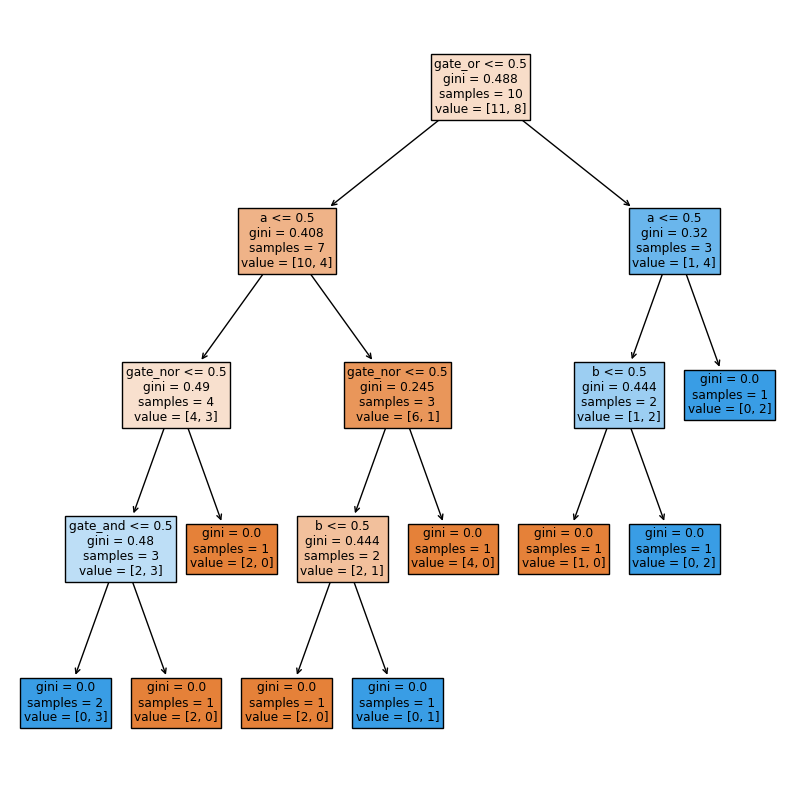

In [150]:
from matplotlib import pyplot as plt
from sklearn import tree

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,10))
_ = tree.plot_tree(rf_model.estimators_[0], feature_names=x_train.columns, filled=True)

In [151]:
import joblib

joblib.dump(rf_model, 'logic_gates_model.pkl', compress=3)

['logic_gates_model.pkl']